# Week 11 Problem 4

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

## Author: John Nguyen
### Primary Reviewer: Kelechi Ikegwu

# Due Date: 6 PM, April 9, 2018

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

from nose.tools import (
    assert_equal,
    assert_is_instance,
    assert_almost_equal,
    assert_true,
    assert_is_not
)
from numpy.testing import assert_array_equal



In this assignment, we will analyze all of President Donald Trump's tweets for 2017. We have already download the Twitter dataset so let us load the data as a DataFrame.

In [5]:
# Load the President Trump's tweets
trump_twitter = pd.read_json('/home/data_scientist/data/misc/trump_tweets_2017.json', encoding='utf8')
trump_twitter.head()

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text
0,2017-12-31 04:46:21,58549,947328044821336064,False,13096,Twitter for iPhone,“Trump Rally: Stocks put 2017 in the record bo...
1,2017-12-30 22:42:09,117013,947236393184628736,False,24332,Twitter for iPhone,Jobs are kicking in and companies are coming b...
2,2017-12-30 22:36:41,195754,947235015343202304,False,50342,Twitter for iPhone,"I use Social Media not because I like to, but ..."
3,2017-12-30 21:12:45,73325,947213895286054912,False,16703,Twitter for iPhone,On Taxes: “This is the biggest corporate rate ...
4,2017-12-30 19:02:53,78932,947181212468203520,False,23270,Twitter for iPhone,"Oppressive regimes cannot endure forever, and ..."


## Question 1: Data Preprocessing

Donald Trump assumed office on January 20, 2017 so we are only interested in his tweets starting from that date. Perform the following data cleaning procedure:

1. Remove all tweets from 01/01/2017 to 01/19/2017 (i.e., "created_at" >= "2017-01-20")
2. Remove all retweets (i.e., "is_retweet" == False).
3. Remove the column "source" and "is_retweet".

Your function will perform the above steps and output the cleaned DataFrame.

__Hint__: You do not have to pay attention to the time value for the date. Simply subset the DataFrame by the given date format (e.g., '2017-01-20').

In [6]:
def clean_data(df):
    '''    
    Parameters
    ----------
    df: a Pandas DataFrame of President Trump's tweets.
    
    Returns
    -------
    result: a Pandas DataFrame.
    '''

    # YOUR CODE HERE
    result = df[('2017-01-20' <= df['created_at'])]
    result = result[result['is_retweet'] == False]
    result = result.drop(['source','is_retweet'], axis = 1)
    
    
    return result

In [7]:
trump_df = clean_data(trump_twitter)

assert_equal(type(trump_df), pd.DataFrame)
assert_equal(2150 < len(trump_df) <= 2152, True)
assert_equal(list(trump_df.columns), ['created_at', 'favorite_count', 'id_str', 'retweet_count', 'text'])

## Question 2

Known as a voracious tweeter, President Trump often tweets during odd times during the day. Create the function <i>trump_histogram()</i> which plots a histogram of the time of day of tweets.

![prob2_solution](images/trump_tweet_histogram.png)

Use the example plot above as a reference. Note, you do not have to replicate the plot but make sure you set a plot title and labels for the axes.

__Hint__: There are several way to get a frequency count of the tweets by hour of day. One straight forward way is to do the following:
- Use the pandas built-in function [.groupby()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) on the hour part of the 'created_at' column.
- To extract the hours of the date, you need to use _dt.hour_ from the [_datetime_ library](https://docs.python.org/3/library/datetime.html)
- Use the pandas built-in function [.count()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html) in order to get a count of each of the hours.

In [96]:
def trump_histogram(df):
    '''    
    Parameters
    ----------
    df: a Pandas DataFrame of President Trump's tweets.
    
    Returns
    -------
    ax: A matplotlib.Axes instance.
    '''
    # YOUR CODE HERE
    df['hour'] = df['created_at'].dt.hour

    count = df[['hour']]
    fig, ax = plt.subplots()
    
    ax.hist(df['hour'], bins=24)
    ax.set_title('President Trump\'s Tweets by Time of Day')
    ax.set_xlim(0,24)
    ax.set(xlabel='Hour of the Day', ylabel='Count')
    
    return ax
#     return df


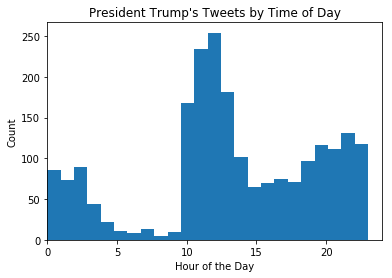

In [97]:
# Call the function
ax = trump_histogram(trump_df)
plt.show()

In [98]:
# Check to see if an Axes object is returned
assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

# Check to see your y axis consist of the correct counts
assert_equal(
    265 <= int(round(ax.get_ylim()[1])) <= 270, True,
    msg="Your frequency count is inaccurate."
)

# Check to see your x axis consist of the correct counts
assert_equal(
    int(round(ax.get_xlim()[1])), 24,
    msg="Your x-axis shoud have 24 values."
)

# Check if the title is set
assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)

# Check if the x-axis has a label.
assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)

# Check if the y-axis has a label.
assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)

## Question 3

Our dataset have two variables which tells us how "good" a tweet is.
1. <i>retweet_count</i> tells us about the reach of the tweet
2. <i>favorite_count</i> tells us how many people like the tweet.

We would like to determine the best and worse _n_ tweets based on either variable using the function <i>best_worse_tweet()</i>. Your function should return a list of the _n_ best first followed by the worse tweets based on the variable input.

__Example__:

- <i><b>best_worse_tweet(df, 'retweet_count', 3)</b></i> will return a list containing the 3 tweets with the highest <i>retweet_count</i> and the 3 tweets with the lowest <i>retweet_count</i>. There should be 6 tweets in total.
- <i><b>best_worse_tweet(df, 'favorite_count', 2)</b></i> will return a list containing the 2 tweets with the highest <i>retweet_count</i> and the 2 tweets with the lowest <i>favorite_count</i>. There should be 4 tweets in total.

__Hint__: There are built-in pandas functions which you may use. Please see the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [80]:
def best_worse_tweet(df, variable, n):
    '''    
    Parameters
    ----------
    df: a Pandas DataFrame of President Trump's tweets.
    variable: a String
    n: a Int.
    
    Returns
    -------
    result: a List of strings.
    '''
    # YOUR CODE HERE
    df = df.sort_values(variable, ascending = False)
    result = list(df[:n]['text'])
    df = df.sort_values(variable)
    result += list(df[:n]['text'])
    
 
    return result

['#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg',
 'Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!',
 'Despite the constant negative press covfefe',
 "I don't know Putin, have no deals in Russia, and the haters are going crazy - yet Obama can make a deal with Iran, #1in terror, no problem!",
 'Will be interviewed on @oreillyfactor tonight at 8:00 P.M.',
 'Playef golf today with Prime Minister Abe of Japan and @TheBig_Easy, Ernie Els, and had a great time. Japan is very well represented!']

In [81]:
test1 = best_worse_tweet(trump_df, 'retweet_count', 3)
assert_equal(type(test1), list)
assert_equal(len(test1), 6)
assert_equal(test1, ['#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg',
                     'Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!',
                     'Despite the constant negative press covfefe',
                     "I don't know Putin, have no deals in Russia, and the haters are going crazy - yet Obama can make a deal with Iran, #1in terror, no problem!",
                     'Will be interviewed on @oreillyfactor tonight at 8:00 P.M.',
                     'Playef golf today with Prime Minister Abe of Japan and @TheBig_Easy, Ernie Els, and had a great time. Japan is very well represented!'])

test2 = best_worse_tweet(trump_df, 'favorite_count', 2)
assert_equal(type(test2), list)
assert_equal(len(test2), 4)
assert_equal(test2, ['Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!',
                     '#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg',
                     'Playef golf today with Prime Minister Abe of Japan and @TheBig_Easy, Ernie Els, and had a great time. Japan is very well represented!',
                     "I don't know Putin, have no deals in Russia, and the haters are going crazy - yet Obama can make a deal with Iran, #1in terror, no problem!"])

Let us now perform sentiment analysis of President Trump's tweets. How many of his tweets during his first year in office are considered positve and how many are negative? We will answer this question directly without the usage of libraries such as _nltk_.

We rely on a list of pre-defined negative words to build our sentiment analysis model. There are several to choose from but we rely on the list from [Hu and Liu (2004)](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html).

In [82]:
from urllib.request import urlopen

# Load the text file of negative words
data = urlopen('http://ptrckprry.com/course/ssd/data/negative-words.txt')

negative_words = []
for line in data:
    # Remove the comments from the file
    if ';' not in str(line):
        negative_words.append((line.strip()).decode('latin-1'))
negative_words = list(filter(None, negative_words))


# Load the text file of positive words
data = urlopen('http://ptrckprry.com/course/ssd/data/positive-words.txt')

positive_words = []
for line in data:
    # Remove the comments from the file
    if ';' not in str(line):
        positive_words.append((line.strip()).decode('latin-1'))
positive_words = list(filter(None, positive_words))

# Print some negative words
print(negative_words[0:10])

# Print some positive words
print(positive_words[0:10])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']


In [83]:
# Print some negative words
print(negative_words[0:10])

# Print some positive words
print(positive_words[0:10])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']


Let us extract the tweets from the data and clean it up. In particular, we do the following:

- Remove all hastags (e.g., #MAGA)
- Remove all Twitter handles (e.g. @KellyannePolls)
- Remove all urls (e.g., 'https://t.co/0foQGaFjMh')
- Remove all punctuations.
- Uncapitalize all words.

In [84]:
import re

trump_tweets = []
for i in list(trump_df['text']):
    trump_tweets.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", i).split()).lower())

# Print some sample tweets
print(trump_tweets[0])
print(trump_tweets[11])
print(trump_tweets[25])

trump rally stocks put 2017 in the record books
together we are making america great again
merry christmas


## Question 4

Given a tweet, we would like to compute the proportions of positive and negative words. The function <i>pos_neg_prop()</i> will take a string along with lists of positive and negative words.

For each word in the string, compute how many of them are in the list of positive words and how many are in the list of negative words. Your function should output a tuple of the proportions. That is, $\left( \frac{\text{# of positive words}}{\text{total number of words}}, \frac{\text{# of negative words}}{\text{total number of words}} \right)$.

__Example__:

<i>pos_neg_prop('merry christmas', positive_words, negative_words)</i> $\rightarrow$ (0.5, 0.0)

<i>pos_neg_prop('make america great again', positive_words, negative_words)</i> $\rightarrow$ (0.25, 0.0)

<i>pos_neg_prop('the most hated part of obamacare is the individual mandate', positive_words, negative_words)</i> $\rightarrow$ (0.0, 0.1)

In [91]:
def pos_neg_prop(tweet, pos_words, neg_words):
    '''
    Parameters
    ----------
    tweet: a String.
    pos_words: a List of string.
    neg_words: a List of string.
    
    Returns
    -------
    pos_prop: A float.
    neg_prop: A float.
    '''

    # YOUR CODE HERE
    tokens = tweet.lower().split()
    pos = 0
    neg = 0
    for word in tokens:
        if word in pos_words:
            pos += 1 
        if word in neg_words:
            neg += 1 
    
    pos_prop = pos / len(tokens)
    neg_prop = neg / len(tokens)
    
 
    return pos_prop, neg_prop

In [92]:
assert_equal(pos_neg_prop(trump_tweets[25], positive_words, negative_words), (0.5, 0.0))
assert_equal(pos_neg_prop(trump_tweets[115], positive_words, negative_words), (0.045454545454545456, 0.1590909090909091))
assert_equal(pos_neg_prop(trump_tweets[633], positive_words, negative_words), (0.047619047619047616, 0.0))
assert_equal(pos_neg_prop(trump_tweets[1124], positive_words, negative_words), (0.15384615384615385, 0.0))
assert_equal(pos_neg_prop(trump_tweets[2002], positive_words, negative_words), (0.045454545454545456, 0.045454545454545456))

Using what you've computed in Question 4, let us examine if the majority of President Trump's tweets are positive or negative.

In [93]:
positive_tweets = 0
negative_tweets = 0

# Determine which tweets are positive/negative based on the proportion of words
for tweet in trump_tweets:
    pos_prop, neg_prop = pos_neg_prop(tweet, positive_words, negative_words)
    if pos_prop > neg_prop:
        positive_tweets += 1
    elif neg_prop > pos_prop:
        negative_tweets += 1

print('Number of Positive Tweets:', positive_tweets)
print('Number of Negative Tweets:', negative_tweets)

Number of Positive Tweets: 1079
Number of Negative Tweets: 548


As we can see, the majority of President Trump's tweets are positive although there is a large number of negative tweets.